1. Import Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import skew

2. Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/bt4012/fraud_oracle.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
for col in df.columns:
    print(f"Column '{col}': {df[col].unique()}")

Column 'Month': ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
Column 'WeekOfMonth': [5 3 2 4 1]
Column 'DayOfWeek': ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Column 'Make': ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
Column 'AccidentArea': ['Urban' 'Rural']
Column 'DayOfWeekClaimed': ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
Column 'MonthClaimed': ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
Column 'WeekOfMonthClaimed': [1 4 2 3 5]
Column 'Sex': ['Female' 'Male']
Column 'MaritalStatus': ['Single' 'Married' 'Widow' 'Divorced']
Column 'Age': [21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66]


3. Data Cleaning
- Replace 0 in WeekOfMonth, WeekOfMonthClaimed, DayOfWeekClaimed and MonthClaimed with the mode
- Replace 0 in Age with 16.5 (Mean of AgeOfPolicyHolder="16 to 17")
- Drop PolicyNumber since it is a unique identifier and PolicyType since it is a concatenation of VehicleCategory and BasePolicy

In [ ]:
df['AgeOfPolicyHolder'].unique()

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25',
       '36 to 40', '16 to 17', 'over 65', '18 to 20'], dtype=object)

In [ ]:
df_test = df[df['Age'] == 0]
df_test[['Age', 'AgeOfPolicyHolder']]

,Age,AgeOfPolicyHolder
7,0,16 to 17
13,0,16 to 17
28,0,16 to 17
31,0,16 to 17
58,0,16 to 17
...,...,...
15243,0,16 to 17
15262,0,16 to 17
15274,0,16 to 17
15379,0,16 to 17


In [ ]:
#replace 0 in WeekOfMonth, WeekOfMonthClaimed, DayOfWeekClaimed and MonthClaimed with the mode
df['WeekOfMonth'] = df['WeekOfMonth'].replace(0, df['WeekOfMonth'].mode()[0])
df['WeekOfMonthClaimed'] = df['WeekOfMonthClaimed'].replace(0, df['WeekOfMonthClaimed'].mode()[0])
df["DayOfWeekClaimed"] = df["DayOfWeekClaimed"].replace("0", df["DayOfWeekClaimed"].mode()[0])
df["MonthClaimed"] = df["MonthClaimed"].replace("0", df["MonthClaimed"].mode()[0])

#replace 0 in Age with 16.5
df['Age'] = df['Age'].replace(0, 16.5)

In [ ]:
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27.0,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35.0,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30.0,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24.0,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34.0,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [ ]:
#Drop PolicyNumber and PolicyType
df = df.drop(columns=['PolicyNumber', 'PolicyType'])

4. Feature Engineering
- Map inherently ordinal features to a numerical representation
- One-hot encode categorical features
- Binary encode binary features
- Create 4 new features



In [ ]:
# Map to numerical representation
df["MappedVehiclePrice"] = df["VehiclePrice"].map({"more than 69000": 75000, '20000 to 29000': 24500, '30000 to 39000': 34500, 'less than 20000': 15000, '40000 to 59000': 49500, '60000 to 69000': 64500})
df["MappedDaysPolicyAccident"] = df["Days_Policy_Accident"].map({'more than 30': 35, '15 to 30': 22.5, 'none': 0, '1 to 7': 3.5, '8 to 15': 11.5})
df["MappedDaysPolicyClaim"] = df["Days_Policy_Claim"].map({'more than 30': 35, '15 to 30': 22.5, '8 to 15': 11.5, 'none': 0})
df['MappedPastNumberOfClaims'] = df["PastNumberOfClaims"].map({'none': 0, '1': 1, '2 to 4': 3, 'more than 4': 5})
df["MappedAgeOfVehicle"] = df["AgeOfVehicle"].map({'3 years': 3, '6 years': 6, '7 years': 7, 'more than 7': 8, '5 years': 5, 'new': 0, '4 years': 4, '2 years': 2})
df["MappedNumberOfSuppliments"] = df['NumberOfSuppliments'].map({'none': 0, 'more than 5': 6, '3 to 5':4, '1 to 2': 1.5})
df["MappedAddressChangeClaim"] = df["AddressChange_Claim"].map({'no change': 0, 'under 6 months': 0.5, '1 year': 1, '2 to 3 years': 2.5, "4 to 8 years": 6})
df["MappedNumberOfCars"] = df["NumberOfCars"].map({'3 to 4': 3.5, '1 vehicle': 1, '2 vehicles': 2, '5 to 8': 6.5, 'more than 8': 9})


In [ ]:
#One hot encode categorical features
def one_hot_encode(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name).astype(int)
    df = pd.concat([df, dummies], axis=1)
    return df
categorical_features = ["Month", "WeekOfMonth", "DayOfWeek", "Make", "DayOfWeekClaimed", "WeekOfMonthClaimed", "MonthClaimed", "MaritalStatus", "VehicleCategory", "BasePolicy"]
for feature in categorical_features:
    df = one_hot_encode(df, feature)
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,0,0,1,0,0,1,0,0,0,1
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,0,0,1,0,0,1,0,0,1,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,0,1,0,0,0,1,0,0,1,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,0,1,0,0,0,1,0,0,0,1
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,0,1,0,0,1,0,0,0,1,0
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,0,1,0,0,0,1,0,0,0,1
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,0,0,1,0,1,0,0,0,1,0
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
# Binary encode binary features
df["AccidentArea"] = df["AccidentArea"].map({"Rural": 0, "Urban": 1})
df["Sex"] = df["Sex"].map({"Male": 0, "Female": 1})
df["Fault"] = df["Fault"].map({"Policy Holder": 0, "Third Party": 1})
df["PoliceReportFiled"] = df["PoliceReportFiled"].map({"No": 0, "Yes": 1})
df["WitnessPresent"] = df["WitnessPresent"].map({"No": 0, "Yes": 1})
df["AgentType"] = df['AgentType'].map({'External': 0, 'Internal': 1})

In [ ]:
# Create ClaimMadeDate and ClaimProcessedDate
# Map month abbreviations to numbers
month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
             'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

# Map DayOfWeek to numbers (Monday=0)
dow_map = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4,
           'Friday':5, 'Saturday':6, 'Sunday':7}

# Function to approximate date from Year, Month, WeekOfMonth, DayOfWeek
def approximate_date(year, month, week, dayofweek):
    try:
        # Convert month and day to numbers
        month_num = month_map[month]
        dow_num = dow_map[dayofweek]

        # First day of the month
        first_day = pd.Timestamp(year=int(year), month=month_num, day=1)

        # Approximate day: start of week + day offset
        day = (week - 1) * 7 + 1 + dow_num

        # If day exceeds number of days in month, cap at last day
        last_day = first_day + pd.offsets.MonthEnd(0)
        if day > last_day.day:
            day = last_day.day

        return pd.Timestamp(year=int(year), month=month_num, day=day)

    except:
        return pd.NaT

# Create ClaimMadeDate
df['ClaimMadeDate'] = df.apply(lambda x: approximate_date(x['Year'], x['Month'], x['WeekOfMonth'], x['DayOfWeek']), axis=1)

# Create ClaimProcessedDate
df['ClaimProcessedDate'] = df.apply(lambda x: approximate_date(x['Year'], x['MonthClaimed'], x['WeekOfMonthClaimed'], x['DayOfWeekClaimed']), axis=1)

df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,MaritalStatus_Single,MaritalStatus_Widow,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,ClaimMadeDate,ClaimProcessedDate
0,Dec,5,Wednesday,Honda,1,Tuesday,Jan,1,1,Single,...,1,0,0,1,0,0,0,1,1994-12-31,1994-01-03
1,Jan,3,Wednesday,Honda,1,Monday,Jan,4,0,Single,...,1,0,0,1,0,0,1,0,1994-01-18,1994-01-23
2,Oct,5,Friday,Honda,1,Thursday,Nov,2,0,Married,...,0,0,0,1,0,0,1,0,1994-10-31,1994-11-12
3,Jun,2,Saturday,Toyota,0,Friday,Jul,1,0,Married,...,0,0,0,1,0,0,0,1,1994-06-14,1994-07-06
4,Jan,5,Monday,Honda,1,Tuesday,Feb,2,1,Single,...,1,0,0,1,0,0,1,0,1994-01-30,1994-02-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,1,Tuesday,Nov,5,0,Married,...,0,0,1,0,0,0,1,0,1996-11-27,1996-11-30
15416,Nov,5,Thursday,Pontiac,1,Friday,Dec,1,0,Married,...,0,0,0,1,0,0,0,1,1996-11-30,1996-12-06
15417,Nov,5,Thursday,Toyota,0,Friday,Dec,1,0,Single,...,1,0,1,0,0,0,1,0,1996-11-30,1996-12-06
15418,Dec,1,Monday,Toyota,1,Thursday,Dec,2,1,Married,...,0,0,1,0,0,1,0,0,1996-12-02,1996-12-12


In [ ]:
# Calculate DaysClaimProcessingDelay as difference between ClaimProcessedDate and ClaimMadeDate
df['DaysClaimProcessingDelay'] = (df['ClaimProcessedDate'] - df['ClaimMadeDate']).dt.days
# Calculate DaysAccidentToClaimDelay as difference between MappedDaysPolicyClaim and MappedDaysPolicyAccident
df['DaysAccidentToClaimDelay'] = df['MappedDaysPolicyClaim'] - df['MappedDaysPolicyAccident']

In [ ]:
df['DaysClaimProcessingDelay'].sort_values(ascending=True)

,DaysClaimProcessingDelay
12520,-364
13717,-364
15324,-364
12628,-364
11580,-364
...,...
2941,281
11617,285
9454,287
9446,288


In [ ]:
# Flag invalid negative values in DaysClaimProcessingDelay in InvalidClaimProcessingDelay
df['InvalidClaimProcessingDelay'] = df['DaysClaimProcessingDelay'].apply(lambda x: 1 if x<0 else 0)
# Replace invalid negative values in DaysClaimProcessingDelay with 0
df['DaysClaimProcessingDelay'] = df['DaysClaimProcessingDelay'].apply(lambda x: x if x>=0 else 0)
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,ClaimMadeDate,ClaimProcessedDate,DaysClaimProcessingDelay,DaysAccidentToClaimDelay,InvalidClaimProcessingDelay
0,Dec,5,Wednesday,Honda,1,Tuesday,Jan,1,1,Single,...,1,0,0,0,1,1994-12-31,1994-01-03,0,0.0,1
1,Jan,3,Wednesday,Honda,1,Monday,Jan,4,0,Single,...,1,0,0,1,0,1994-01-18,1994-01-23,5,0.0,0
2,Oct,5,Friday,Honda,1,Thursday,Nov,2,0,Married,...,1,0,0,1,0,1994-10-31,1994-11-12,12,0.0,0
3,Jun,2,Saturday,Toyota,0,Friday,Jul,1,0,Married,...,1,0,0,0,1,1994-06-14,1994-07-06,22,0.0,0
4,Jan,5,Monday,Honda,1,Tuesday,Feb,2,1,Single,...,1,0,0,1,0,1994-01-30,1994-02-10,11,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,1,Tuesday,Nov,5,0,Married,...,0,0,0,1,0,1996-11-27,1996-11-30,3,0.0,0
15416,Nov,5,Thursday,Pontiac,1,Friday,Dec,1,0,Married,...,1,0,0,0,1,1996-11-30,1996-12-06,6,0.0,0
15417,Nov,5,Thursday,Toyota,0,Friday,Dec,1,0,Single,...,0,0,0,1,0,1996-11-30,1996-12-06,6,0.0,0
15418,Dec,1,Monday,Toyota,1,Thursday,Dec,2,1,Married,...,0,0,1,0,0,1996-12-02,1996-12-12,10,0.0,0


In [ ]:
df['DaysAccidentToClaimDelay'].sort_values(ascending=True)

,DaysAccidentToClaimDelay
1516,-35.0
13830,-12.5
13447,-12.5
7223,-12.5
10259,0.0
...,...
7742,35.0
1308,35.0
8018,35.0
13448,35.0


In [ ]:
# Replace invalid negative values in DaysAccidentToClaimDelay with 0
df['DaysAccidentToClaimDelay'] = df['DaysAccidentToClaimDelay'].apply(lambda x: x if x>=0 else 0)
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,ClaimMadeDate,ClaimProcessedDate,DaysClaimProcessingDelay,DaysAccidentToClaimDelay,InvalidClaimProcessingDelay
0,Dec,5,Wednesday,Honda,1,Tuesday,Jan,1,1,Single,...,1,0,0,0,1,1994-12-31,1994-01-03,0,0.0,1
1,Jan,3,Wednesday,Honda,1,Monday,Jan,4,0,Single,...,1,0,0,1,0,1994-01-18,1994-01-23,5,0.0,0
2,Oct,5,Friday,Honda,1,Thursday,Nov,2,0,Married,...,1,0,0,1,0,1994-10-31,1994-11-12,12,0.0,0
3,Jun,2,Saturday,Toyota,0,Friday,Jul,1,0,Married,...,1,0,0,0,1,1994-06-14,1994-07-06,22,0.0,0
4,Jan,5,Monday,Honda,1,Tuesday,Feb,2,1,Single,...,1,0,0,1,0,1994-01-30,1994-02-10,11,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,1,Tuesday,Nov,5,0,Married,...,0,0,0,1,0,1996-11-27,1996-11-30,3,0.0,0
15416,Nov,5,Thursday,Pontiac,1,Friday,Dec,1,0,Married,...,1,0,0,0,1,1996-11-30,1996-12-06,6,0.0,0
15417,Nov,5,Thursday,Toyota,0,Friday,Dec,1,0,Single,...,0,0,0,1,0,1996-11-30,1996-12-06,6,0.0,0
15418,Dec,1,Monday,Toyota,1,Thursday,Dec,2,1,Married,...,0,0,1,0,0,1996-12-02,1996-12-12,10,0.0,0


In [ ]:
# Create DeductibleVehiclePriceRatio by dividing Deductible by MappedVehiclePrice
df['DeductibleVehiclePriceRatio'] = df['Deductible'] / df['MappedVehiclePrice']

df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,ClaimMadeDate,ClaimProcessedDate,DaysClaimProcessingDelay,DaysAccidentToClaimDelay,InvalidClaimProcessingDelay,DeductibleVehiclePriceRatio
0,Dec,5,Wednesday,Honda,1,Tuesday,Jan,1,1,Single,...,0,0,0,1,1994-12-31,1994-01-03,0,0.0,1,0.004000
1,Jan,3,Wednesday,Honda,1,Monday,Jan,4,0,Single,...,0,0,1,0,1994-01-18,1994-01-23,5,0.0,0,0.005333
2,Oct,5,Friday,Honda,1,Thursday,Nov,2,0,Married,...,0,0,1,0,1994-10-31,1994-11-12,12,0.0,0,0.005333
3,Jun,2,Saturday,Toyota,0,Friday,Jul,1,0,Married,...,0,0,0,1,1994-06-14,1994-07-06,22,0.0,0,0.016327
4,Jan,5,Monday,Honda,1,Tuesday,Feb,2,1,Single,...,0,0,1,0,1994-01-30,1994-02-10,11,0.0,0,0.005333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,1,Tuesday,Nov,5,0,Married,...,0,0,1,0,1996-11-27,1996-11-30,3,0.0,0,0.016327
15416,Nov,5,Thursday,Pontiac,1,Friday,Dec,1,0,Married,...,0,0,0,1,1996-11-30,1996-12-06,6,0.0,0,0.011594
15417,Nov,5,Thursday,Toyota,0,Friday,Dec,1,0,Single,...,0,0,1,0,1996-11-30,1996-12-06,6,0.0,0,0.016327
15418,Dec,1,Monday,Toyota,1,Thursday,Dec,2,1,Married,...,0,1,0,0,1996-12-02,1996-12-12,10,0.0,0,0.016327


In [ ]:
for col in df.columns:
    print(f"Column '{col}': {df[col].unique()}")

Column 'Month': ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
Column 'WeekOfMonth': [5 3 2 4 1]
Column 'DayOfWeek': ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Column 'Make': ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
Column 'AccidentArea': [1 0]
Column 'DayOfWeekClaimed': ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday']
Column 'MonthClaimed': ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct']
Column 'WeekOfMonthClaimed': [1 4 2 3 5]
Column 'Sex': [1 0]
Column 'MaritalStatus': ['Single' 'Married' 'Widow' 'Divorced']
Column 'Age': [21.  34.  47.  65.  27.  20.  36.  16.5 30.  42.  71.  52.  28.  61.
 38.  41.  32.  40.  63.  31.  45.  60.  39.  55.  35.  44.  72.  29.
 37.  59.  49.  50.  26.  48.  64.  33.  74.  23.  25.  56.  16.  68.
 18.  51.  22.  53.  46.  

4. Visualise Relationship of Features with Target

In [ ]:
numerical_binary_features = ["AccidentArea", "Sex", "Fault", "PoliceReportFiled", "WitnessPresent", "AgentType", "InvalidClaimProcessingDelay", "Age", "Deductible", "DriverRating", "MappedVehiclePrice", "MappedDaysPolicyAccident", "MappedDaysPolicyClaim", "MappedPastNumberOfClaims", "MappedAgeOfVehicle", "MappedNumberOfSuppliments", "MappedAddressChangeClaim", "MappedNumberOfCars", "DaysClaimProcessingDelay", "DaysAccidentToClaimDelay", "DeductibleVehiclePriceRatio"]
categorical_features = ["Month", "WeekOfMonth", "DayOfWeek", "Make", "DayOfWeekClaimed", "MonthClaimed", "WeekOfMonthClaimed", "MaritalStatus", "VehicleCategory", "BasePolicy"]
binary_label="FraudFound_P"

/tmp/ipython-input-519490107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


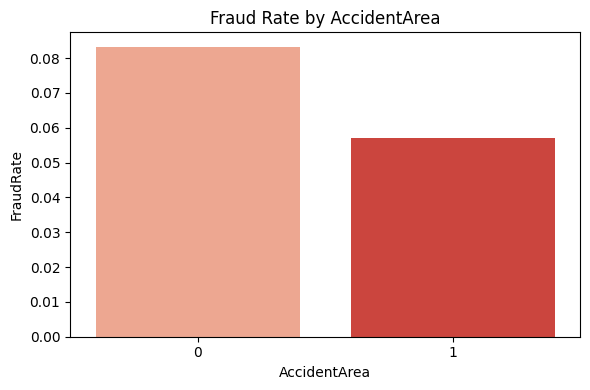

/tmp/ipython-input-519490107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


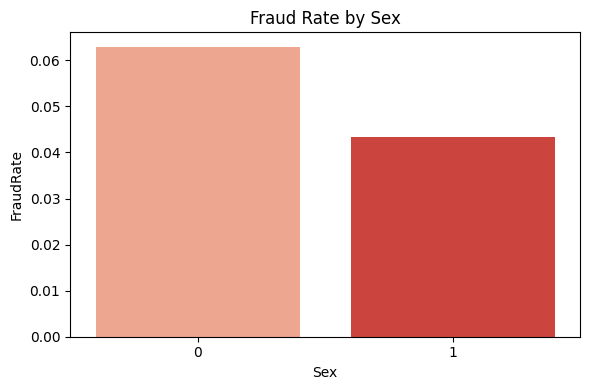

/tmp/ipython-input-519490107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


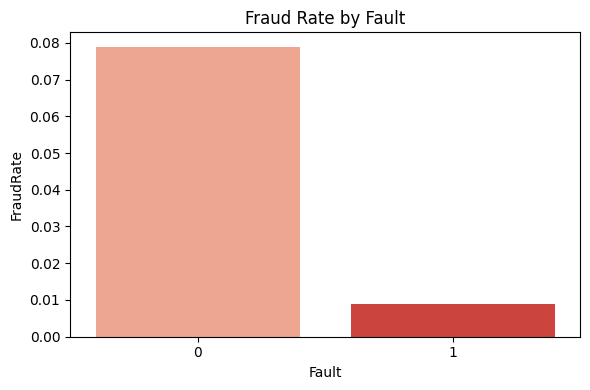

/tmp/ipython-input-519490107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


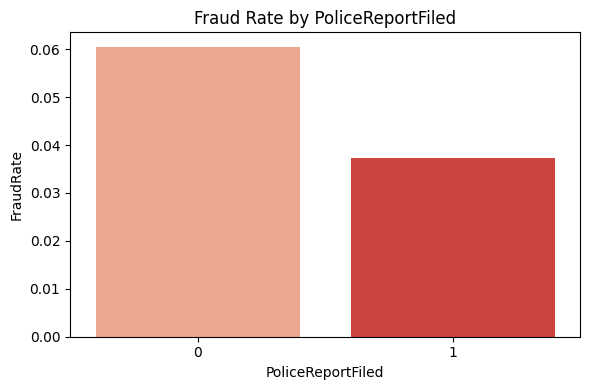

/tmp/ipython-input-519490107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


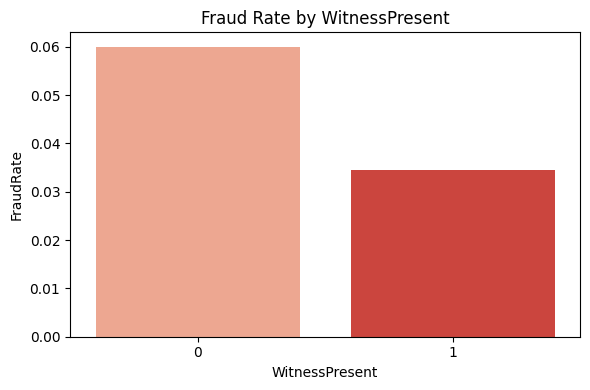

/tmp/ipython-input-519490107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


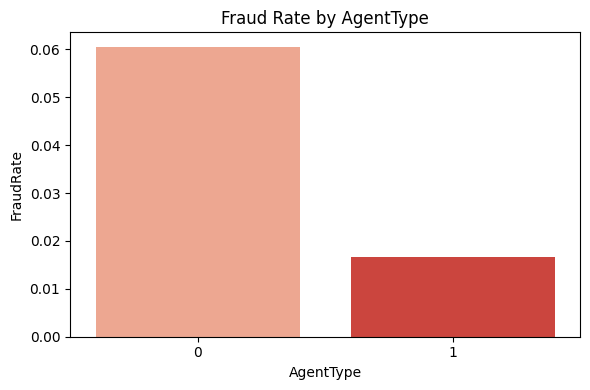

/tmp/ipython-input-519490107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


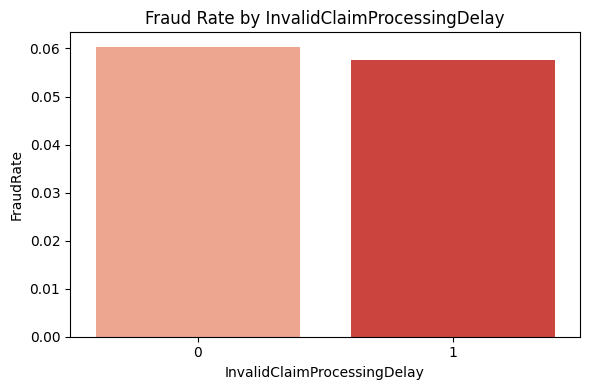

/tmp/ipython-input-519490107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


<Figure size 600x400 with 0 Axes>

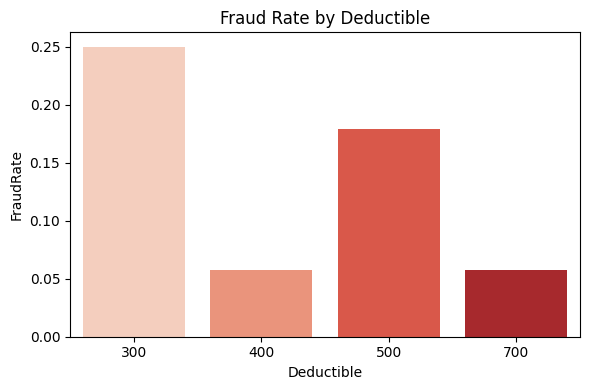

/tmp/ipython-input-519490107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


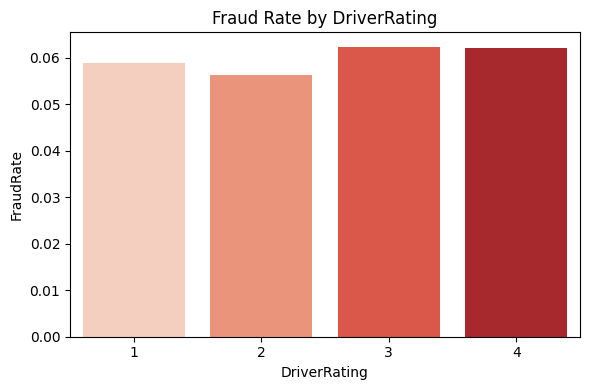

/tmp/ipython-input-519490107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


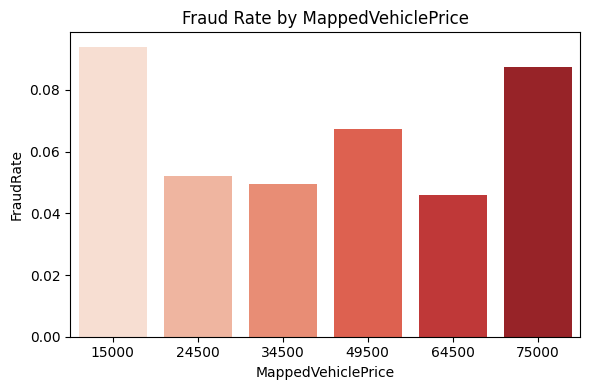

/tmp/ipython-input-519490107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


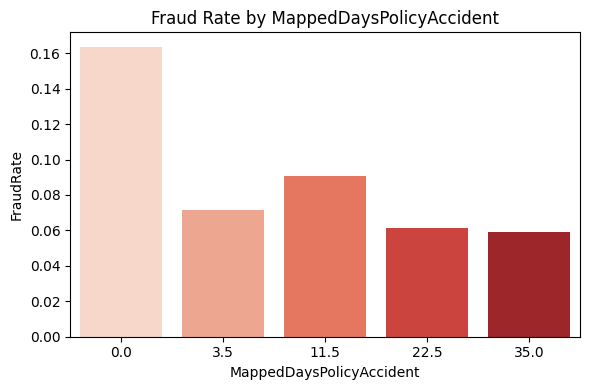

/tmp/ipython-input-519490107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


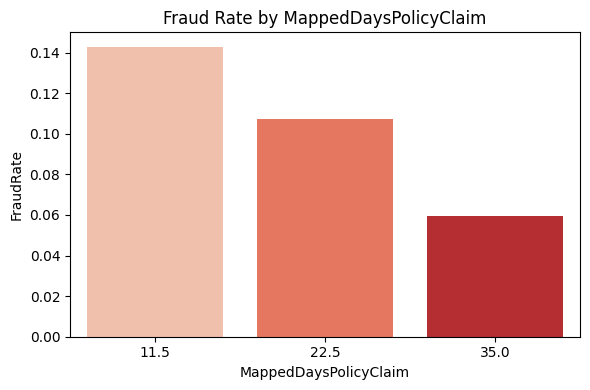

/tmp/ipython-input-519490107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


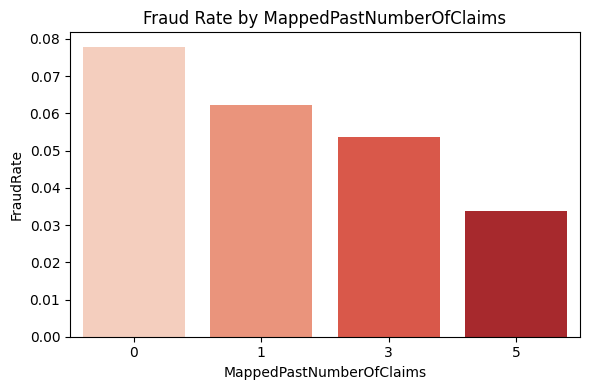

/tmp/ipython-input-519490107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


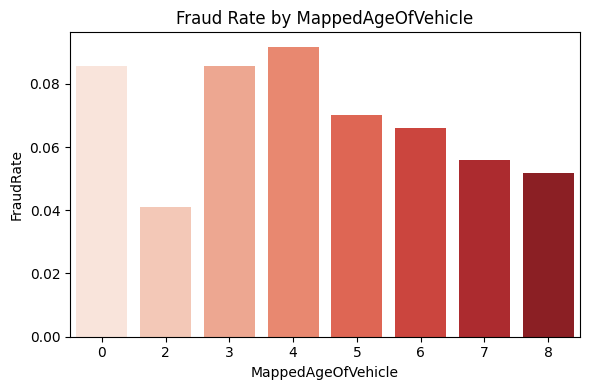

/tmp/ipython-input-519490107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


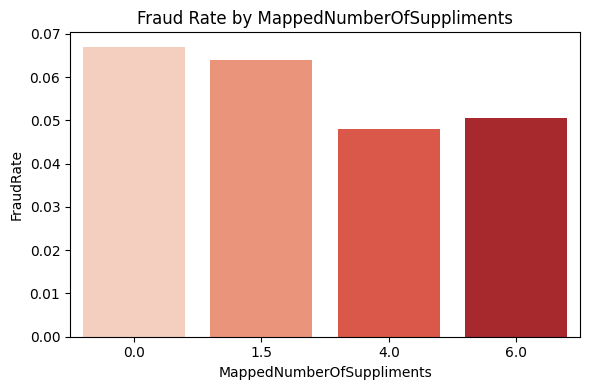

/tmp/ipython-input-519490107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


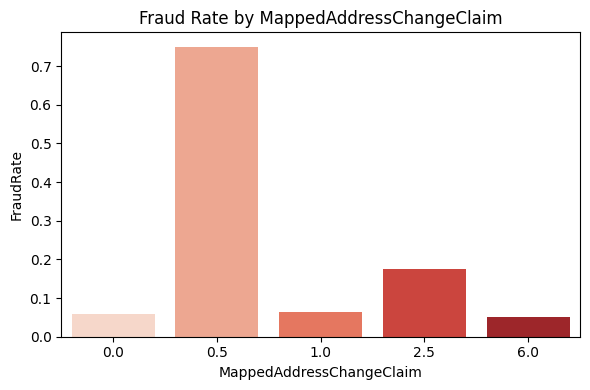

/tmp/ipython-input-519490107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


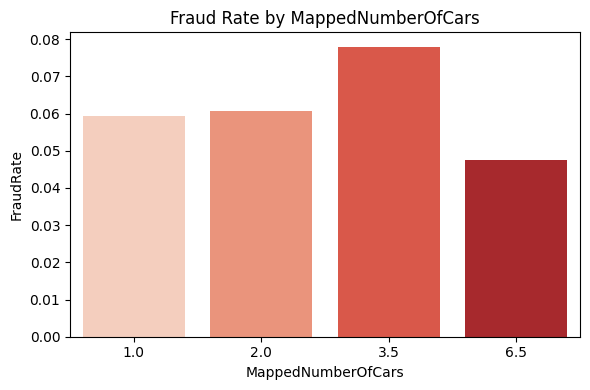

/tmp/ipython-input-519490107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


<Figure size 600x400 with 0 Axes>

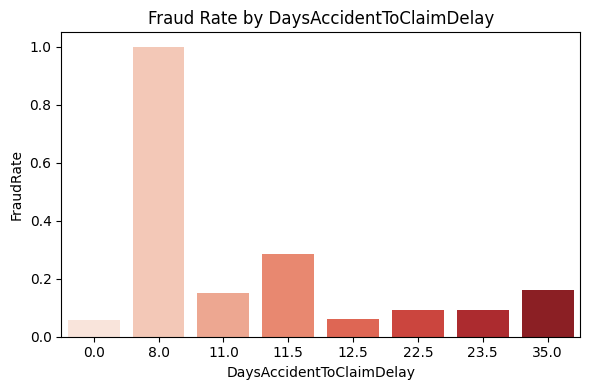

/tmp/ipython-input-519490107.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(["bin", binary_label]).size().reset_index(name="Count")
/tmp/ipython-input-519490107.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totals = counts.groupby("bin")["Count"].transform("sum")
/tmp/ipython-input-519490107.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="bin", y="FraudRate", data=fraud_rate_df, palette="Reds")


<Figure size 600x400 with 0 Axes>

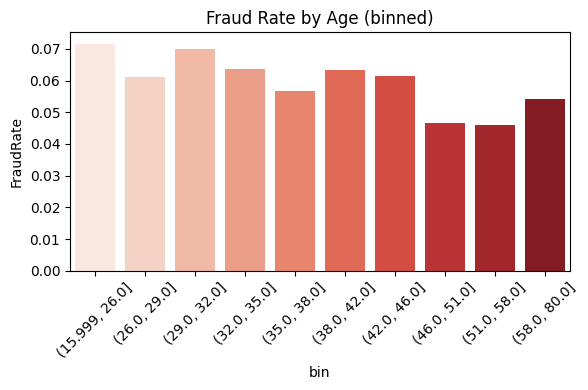

/tmp/ipython-input-519490107.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(["bin", binary_label]).size().reset_index(name="Count")
/tmp/ipython-input-519490107.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totals = counts.groupby("bin")["Count"].transform("sum")
/tmp/ipython-input-519490107.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="bin", y="FraudRate", data=fraud_rate_df, palette="Reds")


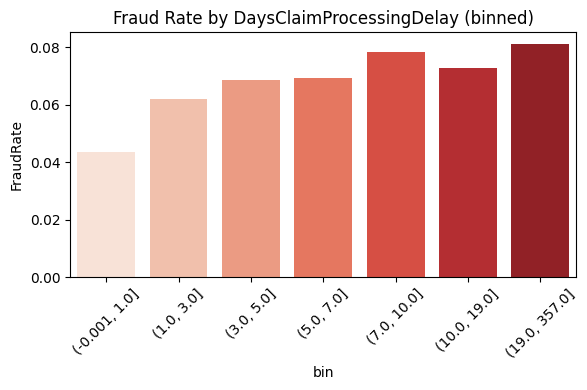

/tmp/ipython-input-519490107.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(["bin", binary_label]).size().reset_index(name="Count")
/tmp/ipython-input-519490107.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totals = counts.groupby("bin")["Count"].transform("sum")
/tmp/ipython-input-519490107.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="bin", y="FraudRate", data=fraud_rate_df, palette="Reds")


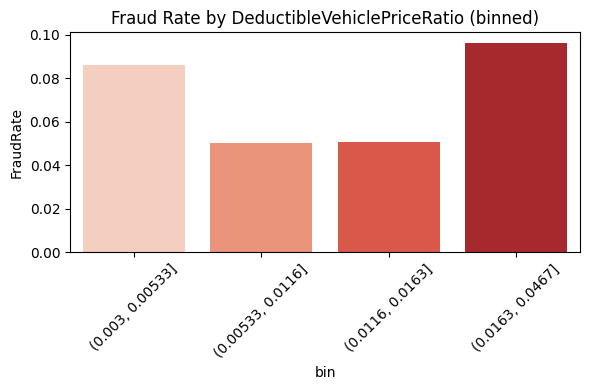

/tmp/ipython-input-519490107.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


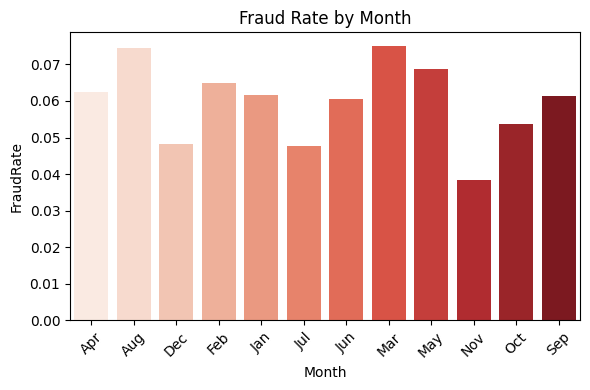

/tmp/ipython-input-519490107.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


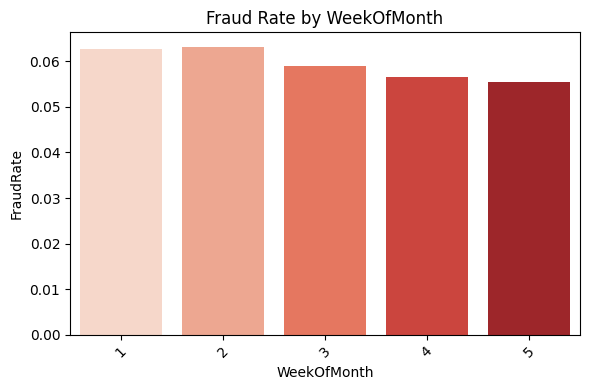

/tmp/ipython-input-519490107.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


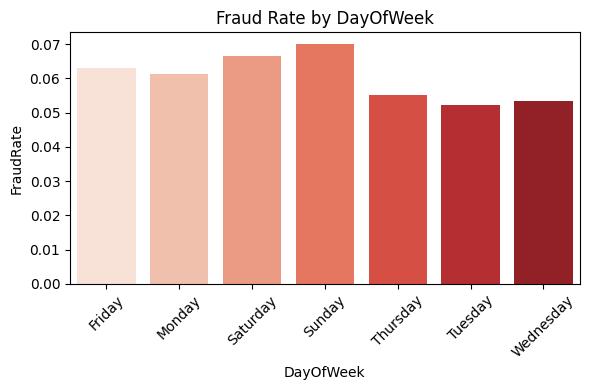

/tmp/ipython-input-519490107.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


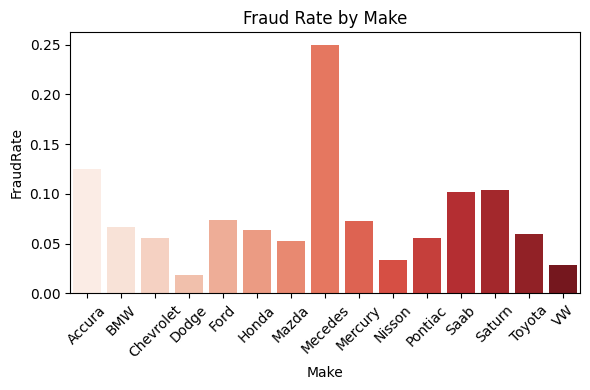

/tmp/ipython-input-519490107.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


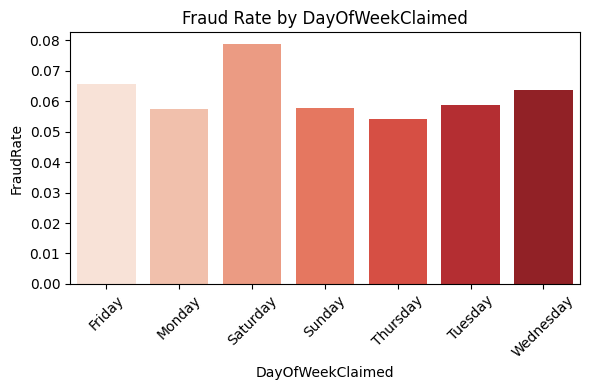

/tmp/ipython-input-519490107.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


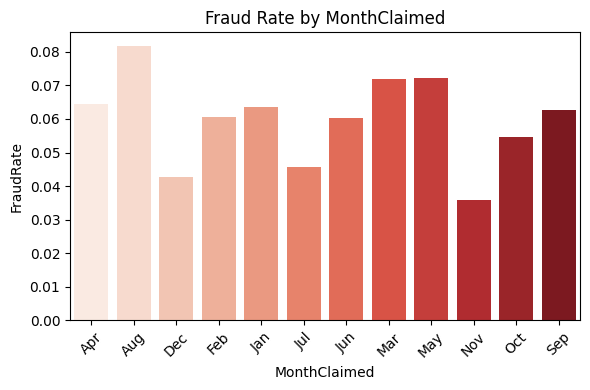

/tmp/ipython-input-519490107.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


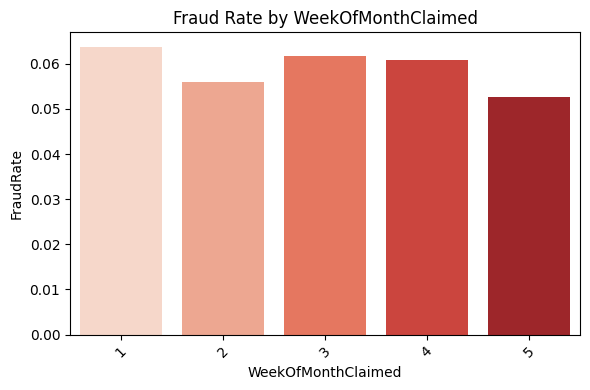

/tmp/ipython-input-519490107.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


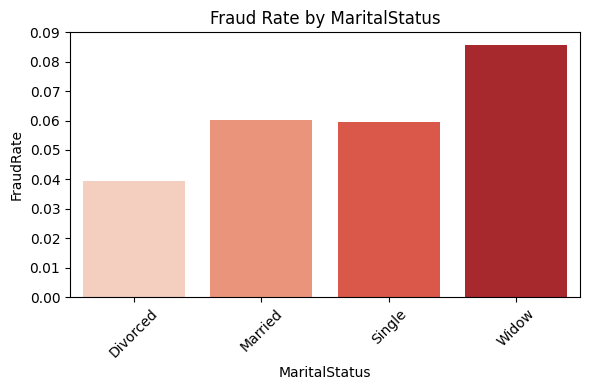

/tmp/ipython-input-519490107.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


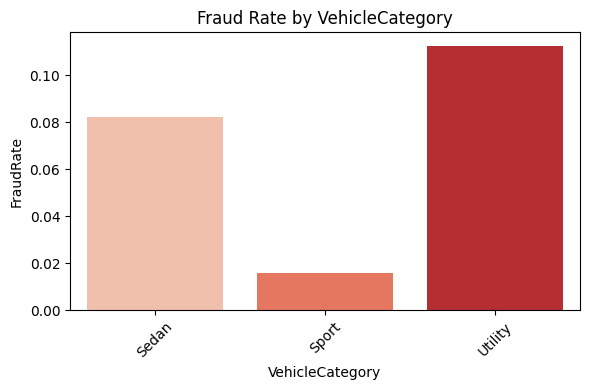

/tmp/ipython-input-519490107.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")


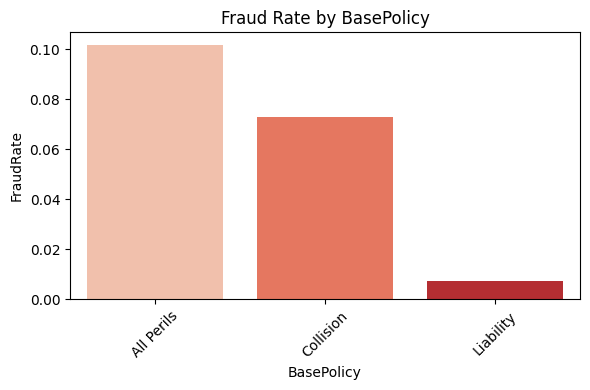

In [ ]:
# Plot FraudRate against feature
for col in numerical_binary_features:
    plt.figure(figsize=(6, 4))

    if df[col].nunique() <= 10:
        counts = df.groupby([col, binary_label]).size().reset_index(name="Count")
        totals = counts.groupby(col)["Count"].transform("sum")
        counts["FraudRate"] = counts["Count"] / totals
        fraud_rate_df = counts[counts[binary_label] == 1]

        sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")
        plt.title(f"Fraud Rate by {col}")
        plt.tight_layout()
        plt.show()

for col in numerical_binary_features:
    if df[col].nunique() > 10:
        plt.figure(figsize=(6, 4))

        df["bin"] = pd.qcut(df[col], q=10, duplicates='drop')

        counts = df.groupby(["bin", binary_label]).size().reset_index(name="Count")
        totals = counts.groupby("bin")["Count"].transform("sum")
        counts["FraudRate"] = counts["Count"] / totals
        fraud_rate_df = counts[counts[binary_label] == 1]

        sns.barplot(x="bin", y="FraudRate", data=fraud_rate_df, palette="Reds")
        plt.title(f"Fraud Rate by {col} (binned)")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        df.drop(columns="bin", inplace=True)

for col in categorical_features:
    plt.figure(figsize=(6, 4))

    counts = df.groupby([col, binary_label]).size().reset_index(name="Count")

    totals = counts.groupby(col)["Count"].transform("sum")

    counts["FraudRate"] = counts["Count"] / totals

    fraud_rate_df = counts[counts[binary_label] == 1]

    sns.barplot(x=col, y="FraudRate", data=fraud_rate_df, palette="Reds")
    plt.title(f"Fraud Rate by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

5. Generate Correlation Matrix for Numerical/Binary Features & Target

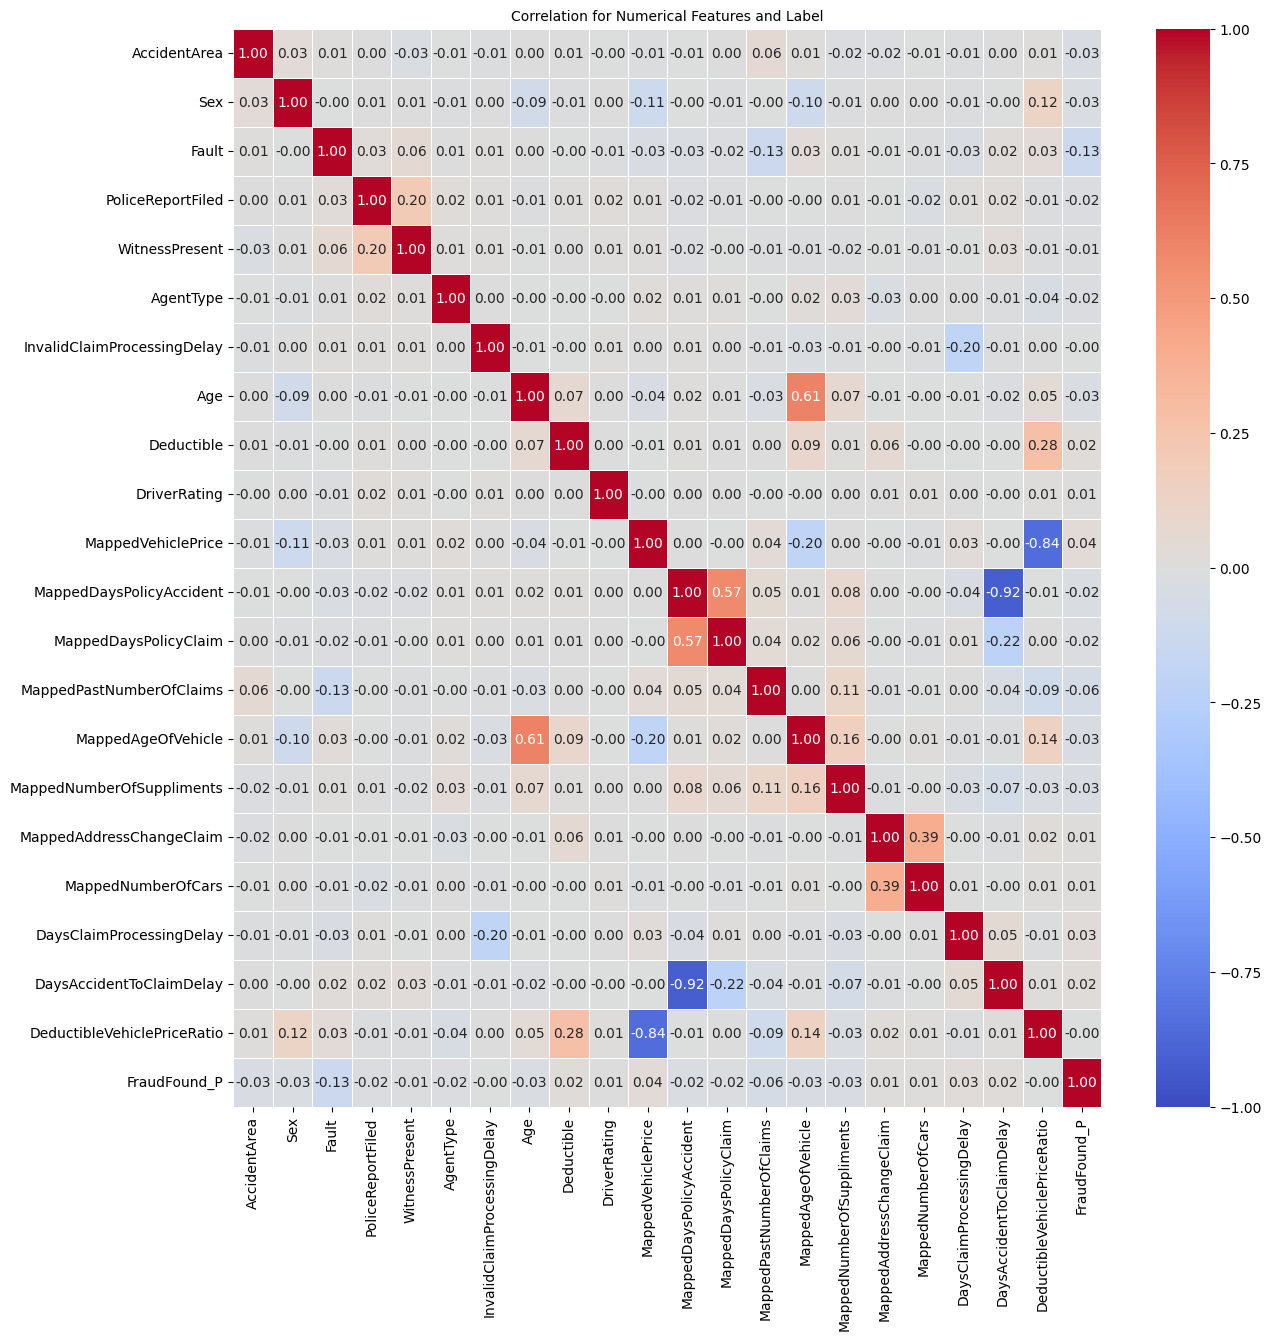

In [ ]:
corr_matrix = df[numerical_binary_features + [binary_label]].corr()

plt.figure(figsize=(14, 14))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=.5
)
plt.title('Correlation for Numerical Features and Label', fontsize=10)
plt.show()

6. Observe Distribution of Features
- Extreme positive skew features: log1p transformed
- Extreme negative skew features: reciprocal transformed

Age                             0.620465
DaysClaimProcessingDelay        6.845344
MappedPastNumberOfClaims        0.369770
MappedVehiclePrice              1.534527
MappedAgeOfVehicle             -2.272441
MappedNumberOfSuppliments       0.519315
MappedDaysPolicyAccident      -10.728431
DaysAccidentToClaimDelay       12.660351
Deductible                      6.078803
MappedDaysPolicyClaim         -16.560967
MappedNumberOfCars              5.636080
DeductibleVehiclePriceRatio     0.574873
dtype: float64


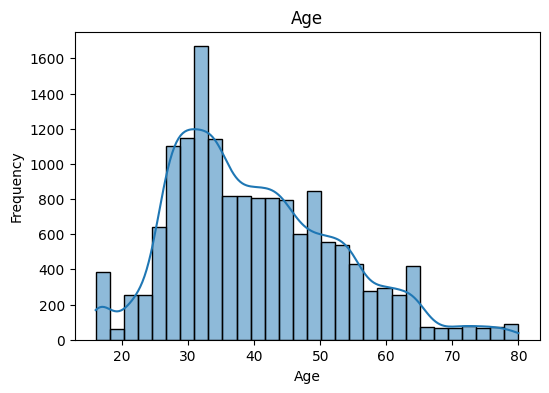

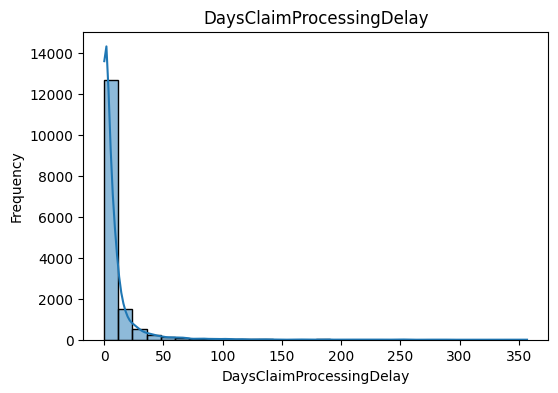

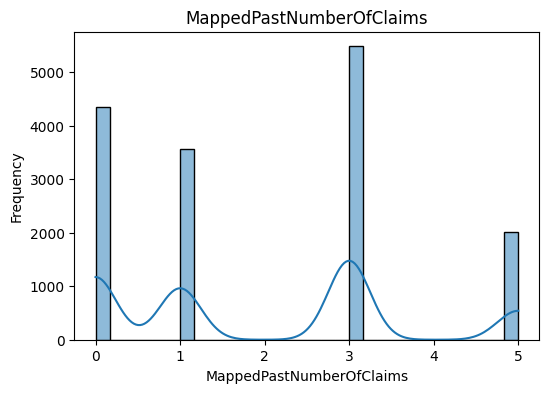

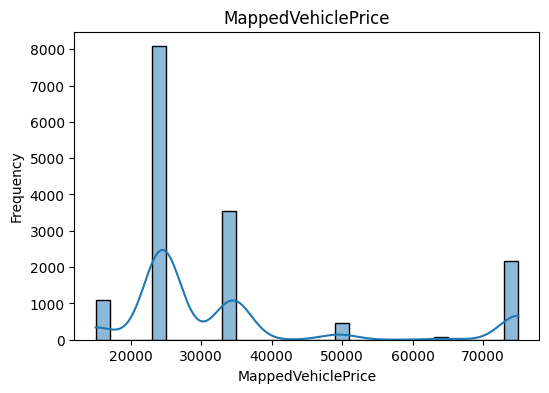

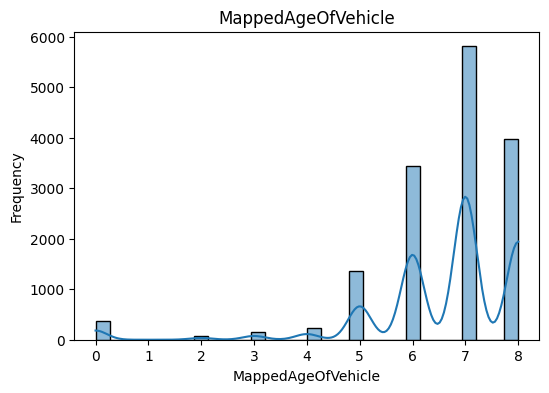

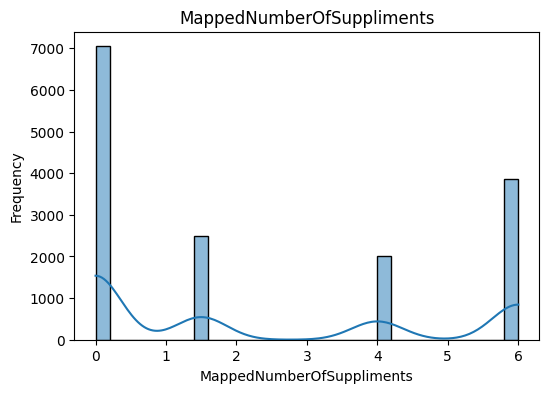

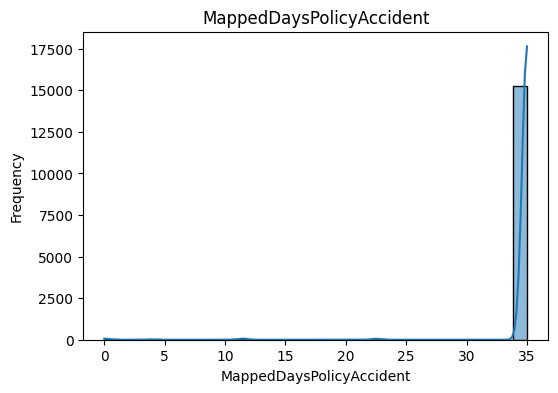

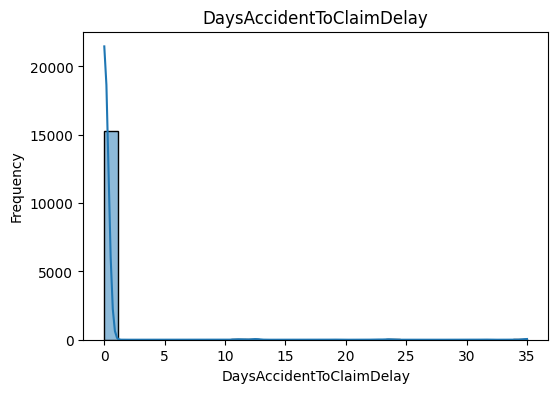

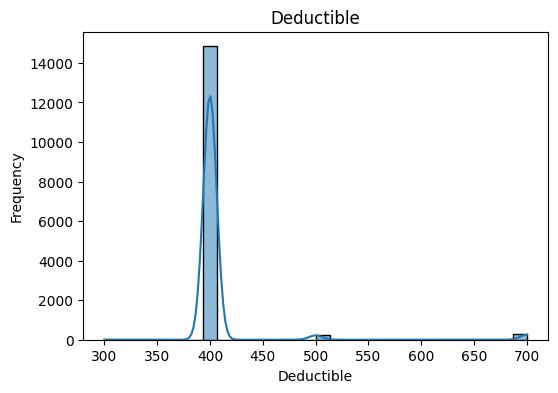

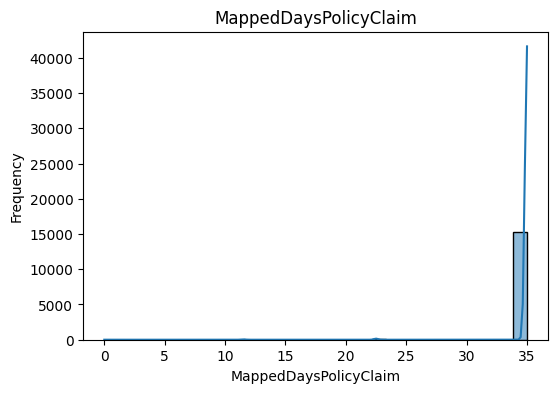

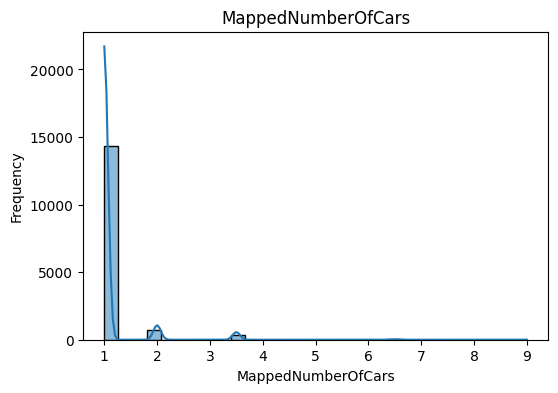

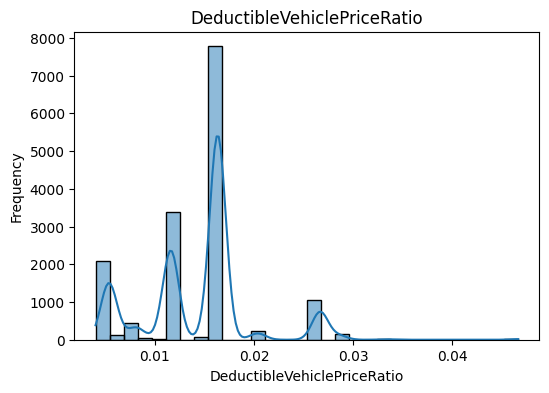

In [ ]:
# Print skew and distribution of each numerical feature
cols = ["Age", "DaysClaimProcessingDelay", "MappedPastNumberOfClaims", "MappedVehiclePrice", "MappedAgeOfVehicle", "MappedNumberOfSuppliments", "MappedDaysPolicyAccident", "DaysAccidentToClaimDelay", "Deductible", "MappedDaysPolicyClaim", "MappedNumberOfCars", "DeductibleVehiclePriceRatio"]
print(df[cols].skew())

for col in cols:
    data = df[col].dropna()
    plt.figure(figsize=(6,4))
    sns.histplot(data, kde=True, bins=30)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
# Log scale extreme positive skew features
cols_to_log_scale = ["DaysClaimProcessingDelay", "MappedVehiclePrice", "DaysAccidentToClaimDelay", "Deductible", "MappedNumberOfCars"]

for col in cols_to_log_scale:
  df[col] = np.log1p(df[col])

# Take reciprocal of extreme negative skew features
cols_to_recip_scale = ["MappedAgeOfVehicle", "MappedDaysPolicyAccident", "MappedDaysPolicyClaim"]

for col in cols_to_recip_scale:
  df[col] = np.reciprocal(np.add(df[col], 1.0))

7. Remove Unnecessary Columns

In [ ]:
unwanted_columns = ["Month", "WeekOfMonth", "DayOfWeek", "Make", "DayOfWeekClaimed", "MonthClaimed", "WeekOfMonthClaimed", "MaritalStatus", "VehicleCategory", "VehiclePrice", "RepNumber", "Days_Policy_Accident", "Days_Policy_Claim", "PastNumberOfClaims", "AgeOfVehicle", "AgeOfPolicyHolder", "NumberOfSuppliments", "AddressChange_Claim", "NumberOfCars", "Year", "BasePolicy", "ClaimMadeDate", "ClaimProcessedDate"]
df = df.drop(columns=unwanted_columns)

In [ ]:
for col in df.columns:
    print(f"Column '{col}': {df[col].unique()}")

Column 'AccidentArea': [1 0]
Column 'Sex': [1 0]
Column 'Age': [21.  34.  47.  65.  27.  20.  36.  16.5 30.  42.  71.  52.  28.  61.
 38.  41.  32.  40.  63.  31.  45.  60.  39.  55.  35.  44.  72.  29.
 37.  59.  49.  50.  26.  48.  64.  33.  74.  23.  25.  56.  16.  68.
 18.  51.  22.  53.  46.  43.  57.  54.  69.  67.  19.  78.  77.  75.
 80.  58.  73.  24.  76.  62.  79.  70.  17.  66. ]
Column 'Fault': [0 1]
Column 'FraudFound_P': [0 1]
Column 'Deductible': [5.70711026 5.99396143 6.2166061  6.55250789]
Column 'DriverRating': [1 4 3 2]
Column 'PoliceReportFiled': [0 1]
Column 'WitnessPresent': [0 1]
Column 'AgentType': [0 1]
Column 'MappedVehiclePrice': [11.22525673 10.10646921 10.44874359  9.61587214 10.80974815 11.07443601]
Column 'MappedDaysPolicyAccident': [0.02777778 0.04255319 1.         0.22222222 0.08      ]
Column 'MappedDaysPolicyClaim': [0.02777778 0.04255319 0.08       1.        ]
Column 'MappedPastNumberOfClaims': [0 1 3 5]
Column 'MappedAgeOfVehicle': [0.25       0.14

In [ ]:
pd.set_option('display.max_columns', None)
df

,AccidentArea,Sex,Age,Fault,FraudFound_P,Deductible,DriverRating,PoliceReportFiled,WitnessPresent,AgentType,MappedVehiclePrice,MappedDaysPolicyAccident,MappedDaysPolicyClaim,MappedPastNumberOfClaims,MappedAgeOfVehicle,MappedNumberOfSuppliments,MappedAddressChangeClaim,MappedNumberOfCars,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,WeekOfMonth_1,WeekOfMonth_2,WeekOfMonth_3,WeekOfMonth_4,WeekOfMonth_5,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Make_Accura,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,DayOfWeekClaimed_Friday,DayOfWeekClaimed_Monday,DayOfWeekClaimed_Saturday,DayOfWeekClaimed_Sunday,DayOfWeekClaimed_Thursday,DayOfWeekClaimed_Tuesday,DayOfWeekClaimed_Wednesday,WeekOfMonthClaimed_1,WeekOfMonthClaimed_2,WeekOfMonthClaimed_3,WeekOfMonthClaimed_4,WeekOfMonthClaimed_5,MonthClaimed_Apr,MonthClaimed_Aug,MonthClaimed_Dec,MonthClaimed_Feb,MonthClaimed_Jan,MonthClaimed_Jul,MonthClaimed_Jun,MonthClaimed_Mar,MonthClaimed_May,MonthClaimed_Nov,MonthClaimed_Oct,MonthClaimed_Sep,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,DaysClaimProcessingDelay,DaysAccidentToClaimDelay,InvalidClaimProcessingDelay,DeductibleVehiclePriceRatio
0,1,1,21.0,0,0,5.707110,1,0,0,0,11.225257,0.027778,0.027778,0,0.250000,0.0,1.0,1.504077,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0.000000,0.0,1,0.004000
1,1,0,34.0,0,0,5.993961,4,1,0,0,11.225257,0.027778,0.027778,0,0.142857,0.0,0.0,0.693147,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1.791759,0.0,0,0.005333
2,1,0,47.0,0,0,5.993961,3,0,0,0,11.225257,0.027778,0.027778,1,0.125000,0.0,0.0,0.693147,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,2.564949,0.0,0,0.005333
3,0,0,65.0,1,0,5.993961,2,1,0,0,10.106469,0.027778,0.027778,1,0.111111,6.0,0.0,0.693147,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,3.135494,0.0,0,0.016327
4,1,1,27.0,1,0,5.993961,1,0,0,0,11.225257,0.027778,0.027778,0,0.166667,0.0,0.0,0.693147,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,2.484907,0.0,0,0.005333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,1,0,35.0,0,1,5.993961,4,0,0,0,10.106469,0.027778,0.027778,3,0.142857,0.0,0.0,0.693147,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1.386294,0.0,0,0.016327
15416,1,0,30.0,0,0,5.993961,3,0,0,0,10.448744,0.027778,0.027778,5,0.142857,6.0,0.0,1.504077,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1.945910,0.0,0,0.011594
15417,0,0,24.0,0,1,5.993961,4,0,0,0,10.106469,0.027778,0.027778,5,0.166667,1.5,0.0,0.693147,0,0,

8. Download Final Dataset

In [ ]:
df.to_csv("/content/drive/MyDrive/bt4012/final_dataset.csv", index=False)